# Prototype

## Business case

Step 1:
- scraping data form wikipedia (https://en.wikipedia.org/wiki/Triple_J_Hottest_100) and billboard (https://www.billboard.com/charts/hot-100)
- Create user input
- check if song is in the list
- if song is in the list, recommend 3 other songs from the list (random)
- if song is not in the list, return no recommendations

Step 2:
- Accept multiple values for '&' and '+' (and)
- add a link to recommended songs on spotify
- Scrape data every week, check for updates, remove songs that are not in the list, add songs that are new
- Split python file web scraping and python file recommendating songs

## Scraping websites

In [65]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from time import sleep
import numpy as np
import random

In [66]:
url = "https://www.billboard.com/charts/hot-100"
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [67]:
soup = BeautifulSoup(response.content, "html.parser")

In [68]:
song_2021 = []
artist_2021 = []
year_2021 = []
songs_2021 = soup.findAll('span',attrs={"class":"chart-element__information"})
for x in songs_2021:
    try:
        song = str(x.find('span', attrs={'class': 'chart-element__information__song text--truncate color--primary'}).text).strip()
        song_2021.append(song)
    except:
        song_2021.append('NA')
    try:
        artist = str(x.find('span', attrs={'class': 'chart-element__information__artist text--truncate color--secondary'}).text).strip()
        artist_2021.append(artist)
    except:
        artist_2021.append('NA')
    year_2021.append('2021')
    
df_2021 = pd.DataFrame({'song':song_2021, 'artist':artist_2021, 'year': year_2021})

In [69]:
df_2021

,song,artist,year
0,Drivers License,Olivia Rodrigo,2021
1,34+35,Ariana Grande,2021
2,Calling My Phone,Lil Tjay Featuring 6LACK,2021
3,Blinding Lights,The Weeknd,2021
4,Up,Cardi B,2021
...,...,...,...
95,Almost Maybes,Jordan Davis,2021
96,Back To The Streets,Saweetie Featuring Jhene Aiko,2021
97,Bad Boy,Juice WRLD & Young Thug,2021
98,Opp Stoppa,YBN Nahmir Featuring 21 Savage,2021


In [70]:
url2 = "https://en.wikipedia.org/wiki/Triple_J_Hottest_100,_2020"
response2 = requests.get(url2)
response2.status_code # 200 status code means OK!

200

In [71]:
soup2 = BeautifulSoup(response2.content, "html.parser")
soup2

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Triple J Hottest 100, 2020 - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YDYl9usft2eIhV-5lQQatgAAAJc","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Triple_J_Hottest_100,_2020","wgTitle":"Triple J Hottest 100, 2020","wgCurRevisionId":1007684741,"wgRevisionId":1007684741,"wgArticleId":65741235,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages which use infobox templates with ignored data cells","Triple J Hottest 100"],"wgPageContentLanguage":"en","wgPageContentModel":"w

In [72]:
link_songs = soup2.select("table.wikitable.sortable > tbody > tr > td")[2].get_text()
link_songs 

'Glass Animals'

In [73]:
song_2020 = []
artist_2020 = []
year_2020 = []

if (response2.status_code == 200):
    wait_time = np.random.randint(1,4)
    sleep(wait_time)
    soup2 = BeautifulSoup(response2.content, "html.parser")
    songs_2020 = soup2.select("table.wikitable.sortable > tbody > tr")
    for i in songs_2020:
        response2 = requests.get(url2)
        try:
            #sub = i.select("td")
            #song_2020.append(sub[1]).get_text()
            song_2020.append(i.select("td")[1].get_text().replace("\n",""))
        except:
            song_2020.append('NA')
        try:
            #sub = i.select("td")
            #artist_2020.append(sub[2]).get_text()
            artist_2020.append(i.select("td")[2].get_text().replace("\n",""))
        except:
            artist_2020.append('NA')
        year_2020.append('2020')
    
df_2020 = pd.DataFrame({'song':song_2020[0:101], 'artist':artist_2020[0:101], 'year': year_2020[0:101]})

In [74]:
df_2020

,song,artist,year
0,NA,NA,2020
1,Heat Waves,Glass Animals,2020
2,Booster Seat,Spacey Jane,2020
3,The Difference,Flume and Toro y Moi,2020
4,Cherub,Ball Park Music,2020
...,...,...,...
96,Germaphobe,Hockey Dad,2020
97,Audacity,Stormzy featuring Headie One,2020
98,Your Man,Joji,2020
99,Itch,Hockey Dad,2020


In [75]:
df_final = pd.concat([df_2020,df_2021], ignore_index=True)
df_final

,song,artist,year
0,NA,NA,2020
1,Heat Waves,Glass Animals,2020
2,Booster Seat,Spacey Jane,2020
3,The Difference,Flume and Toro y Moi,2020
4,Cherub,Ball Park Music,2020
...,...,...,...
196,Almost Maybes,Jordan Davis,2021
197,Back To The Streets,Saweetie Featuring Jhene Aiko,2021
198,Bad Boy,Juice WRLD & Young Thug,2021
199,Opp Stoppa,YBN Nahmir Featuring 21 Savage,2021


In [76]:
df_final = df_final[1:]
df_final

,song,artist,year
1,Heat Waves,Glass Animals,2020
2,Booster Seat,Spacey Jane,2020
3,The Difference,Flume and Toro y Moi,2020
4,Cherub,Ball Park Music,2020
5,Lost in Yesterday,Tame Impala,2020
...,...,...,...
196,Almost Maybes,Jordan Davis,2021
197,Back To The Streets,Saweetie Featuring Jhene Aiko,2021
198,Bad Boy,Juice WRLD & Young Thug,2021
199,Opp Stoppa,YBN Nahmir Featuring 21 Savage,2021


In [77]:
spec_chars = ["!",'"',"#","%","(",")",
              "*",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df_final['song'] = df_final['song'].str.replace(char, '')

df_final['song']

<ipython-input-77-b96cca6e197a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['song'] = df_final['song'].str.replace(char, '')


1                 Heat Waves
2               Booster Seat
3             The Difference
4                     Cherub
5          Lost in Yesterday
               ...          
196            Almost Maybes
197      Back To The Streets
198                  Bad Boy
199               Opp Stoppa
200    How They Remember You
Name: song, Length: 200, dtype: object

In [78]:
song_dict = {'é': 'e', 'à' : 'a', ' (like a version)' : '', ' (flume remix)' : '', ' (go baby)' : '', ' (okokok)' : ''}
df_final['song'].replace(song_dict, regex=True, inplace=True)
df_final['song']

C:\Users\ROB3942\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1                 Heat Waves
2               Booster Seat
3             The Difference
4                     Cherub
5          Lost in Yesterday
               ...          
196            Almost Maybes
197      Back To The Streets
198                  Bad Boy
199               Opp Stoppa
200    How They Remember You
Name: song, Length: 200, dtype: object

In [79]:
song_lower = map(lambda x:x.lower(),df_final['song'])
songlist = list(song_lower)
songlist

['heat waves',
 'booster seat',
 'the difference',
 'cherub',
 'lost in yesterday',
 'wap',
 'hyperfine',
 'sending me ur loving',
 "i'm good",
 'therefore i am',
 'on our own',
 'get on the beers',
 'rockstar',
 'tombstone',
 'skin',
 'screw loose',
 'is it true',
 'tangerine',
 'you should be sad',
 'addicted to the sunshine',
 'energy',
 'complicated',
 'good news',
 'blue world',
 'reality check please',
 'no plans to make plans',
 'under the thunder',
 'straightfaced',
 'dribble',
 'bagilam bargan',
 'reasons',
 'criminals',
 'breathe deeper',
 'everybody rise',
 'running red lights',
 'forget me too',
 'so done',
 'parasite eve',
 'righteous',
 'come & go',
 'i still dream about you',
 'whats poppin',
 'together',
 'you & i',
 'as long as you care',
 'pretty lady',
 'animals',
 "ain't it different",
 'wishing well',
 'nothing to love about love',
 'your love deja vu',
 'the glow',
 'in your eyes',
 'blue flume remix',
 "i think you're great",
 'on the line',
 'sobercoaster',
 'fl

In [82]:
def get_song_input():
    song_title = input("Please enter your favorite song: ").lower()
    if not song_title in list(songlist):
        print("We have no recommendations for you")
        #continue
    else:
        #print("You're favorite song is:", song_title, "\n")
        print("We found some awesome songs for you that you probably like:\n", ",  ".join(random.sample(songlist, k=3)))
        #break
    return song_title

In [84]:
song_title = get_song_input()
song_title

Please enter your favorite song: hello
We have no recommendations for you


'hello'

In [85]:
import sys
sys.path.insert(1, 'C:/Users/ROB3942/ironhack/unit7/')
from config import * # config.py
import requests
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [86]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= my_spotify_clientid,
                                                           client_secret= my_spotify_clientsecret))

In [87]:
chosen_song = sp.search(q=song_title, limit=1) 
chosen_song["tracks"]["items"][0]["uri"]
my_dict = sp.audio_features(chosen_song["tracks"]["items"][0]["uri"])[0] # my_dict is now a dictionary

my_dict
# Change it to a pandas dataframe
#my_dict_new = { key:[my_dict[key]] for key in list(my_dict.keys()) }
#pd.DataFrame(my_dict_new)

{'danceability': 0.905,
 'energy': 0.647,
 'key': 10,
 'loudness': -5.065,
 'mode': 0,
 'speechiness': 0.107,
 'acousticness': 0.0187,
 'instrumentalness': 0,
 'liveness': 0.282,
 'valence': 0.367,
 'tempo': 130.97,
 'type': 'audio_features',
 'id': '2r6OAV3WsYtXuXjvJ1lIDi',
 'uri': 'spotify:track:2r6OAV3WsYtXuXjvJ1lIDi',
 'track_href': 'https://api.spotify.com/v1/tracks/2r6OAV3WsYtXuXjvJ1lIDi',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2r6OAV3WsYtXuXjvJ1lIDi',
 'duration_ms': 190534,
 'time_signature': 4}

In [88]:
#Reading data
df = pd.read_csv('../dataset/data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [89]:
df.shape

(174389, 19)

In [90]:
df = df[:-154389]
df.shape

(20000, 19)

In [91]:
df = df.set_index("name")

In [92]:
num = df.select_dtypes(np.number)
num

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0,0.895000,11,0.3300,-10.203,0,0,0.0447,131.992,0.0709,2021
TE MUDASTE,0.234000,0.811,130014,0.637,1,0.000572,10,0.1180,-4.835,0,90,0.0591,92.025,0.4710,2020
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0,0.547000,7,0.2390,-8.355,1,0,0.0358,130.012,0.4270,2021


In [93]:
num.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.525564,0.552576,2.215271e+05,0.465127,0.071100,0.161390,5.183650,0.202078,-11.541631,0.719000,37.658950,0.097281,116.676079,0.550017,1970.407750
std,0.381800,0.169744,1.036479e+05,0.263658,0.256998,0.312065,3.481268,0.168593,5.319268,0.449499,25.940967,0.164314,30.440957,0.254885,29.233344
min,0.000000,0.000000,1.037100e+04,0.000020,0.000000,0.000000,0.000000,0.000000,-47.046000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.112000,0.436000,1.678498e+05,0.244000,0.000000,0.000000,2.000000,0.098200,-14.452250,0.000000,12.000000,0.034700,93.866500,0.349000,1945.000000
50%,0.579000,0.566000,2.002000e+05,0.438000,0.000000,0.000146,5.000000,0.136000,-10.860000,1.000000,45.000000,0.044900,114.817500,0.568000,1970.000000
75%,0.921000,0.679000,2.546068e+05,0.681000,0.000000,0.075800,8.000000,0.258000,-7.599000,1.000000,60.000000,0.073500,133.993250,0.759000,1995.000000
max,0.996000,0.988000,2.593268e+06,1.000000,1.000000,1.000000,11.000000,0.996000,0.878000,1.000000,96.000000,0.967000,221.741000,0.991000,2021.000000


In [94]:
from sklearn.preprocessing import StandardScaler # based on the distance, like clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [95]:
df_prep = StandardScaler().fit_transform(num)

In [96]:
pd.DataFrame(df_prep, columns=num.columns).head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,1.219089,0.267611,-0.513232,-0.914565,-0.276663,-0.515509,-0.052755,1.049431,-0.204238,-1.599600,-0.989153,-0.022404,1.093946,0.329504,-1.724367
1,0.307594,1.764022,-0.688184,0.196749,-0.276663,-0.432581,-0.052755,-0.718780,0.804761,-1.599600,-1.181903,-0.267064,-0.978544,1.569312,-1.724367
2,1.224327,0.556289,-0.556707,-1.058694,-0.276663,-0.517125,-1.489049,1.879856,-0.104598,0.625156,-1.297553,0.466917,-0.626674,0.545293,-1.724367
3,-1.376123,1.045273,1.935060,1.262549,-0.276663,2.049657,-0.914532,-0.439401,0.795361,0.625156,-0.796403,-0.333403,0.371907,-1.992390,-1.724367
4,-0.603901,0.892098,-0.543228,0.917397,3.614512,-0.516393,1.383539,1.185858,1.035061,-1.599600,-1.374654,-0.124650,0.177394,-0.984850,-1.724367


In [98]:
kmeans = KMeans(n_clusters=20, init="random", n_init=3, max_iter=2, tol=0, algorithm="full", random_state=1234)
kmeans.fit(df_prep)

KMeans(algorithm='full', init='random', max_iter=2, n_clusters=20, n_init=3,
       random_state=1234, tol=0)

In [99]:
clusters = kmeans.predict(df_prep)
pd.Series(clusters).value_counts().sort_index()

0      460
1     1125
2     1298
3      928
4     1205
5      498
6      590
7      953
8      640
9     1968
10    2489
11     435
12     700
13     783
14     303
15     993
16     547
17    1743
18     726
19    1616
dtype: int64

In [100]:
n_init = [1,4,8,20,30,100]
for i in n_init:
    kmeans = KMeans(n_clusters=8, init="random", n_init=i, max_iter=2, tol=0, algorithm="full", random_state=1234)
    kmeans.fit(df_prep)
    print(kmeans.inertia_)
    clusters2 = kmeans.predict(df_prep)

168406.72085726575
168406.72085726575
168406.72085726575
168406.72085726575
168406.72085726575
168406.72085726575


In [101]:
X_df = pd.DataFrame(num)
X_df["cluster"] = clusters
X_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,cluster
name,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920,3
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920,17
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920,1
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920,11
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920,4


In [102]:
kmeans.inertia_

168406.72085726575

In [103]:
#cluster_nr =[10,20,40,50,60]
#init_nr =[3,5,7,9]
#iter_nr = [2,3,4,5]
#tol_nr = [0,1,2]
#for x in cluster_nr:
#    for y in init_nr:
#        for z in iter_nr:
#            for w in tol_nr:
            
#                kmeans = KMeans(n_clusters=x,
#                                init="random",
#                                n_init=y,  # try with 1, 4, 8, 20, 30, 100...
#                                max_iter=z,
#                                tol=w,
#                                algorithm="full",
#                                random_state=1234)
#                kmeans.fit(df_prep)
#                if kmeans.inertia_ < 860000:
#                    print(x,y,z,w)
#                    print(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

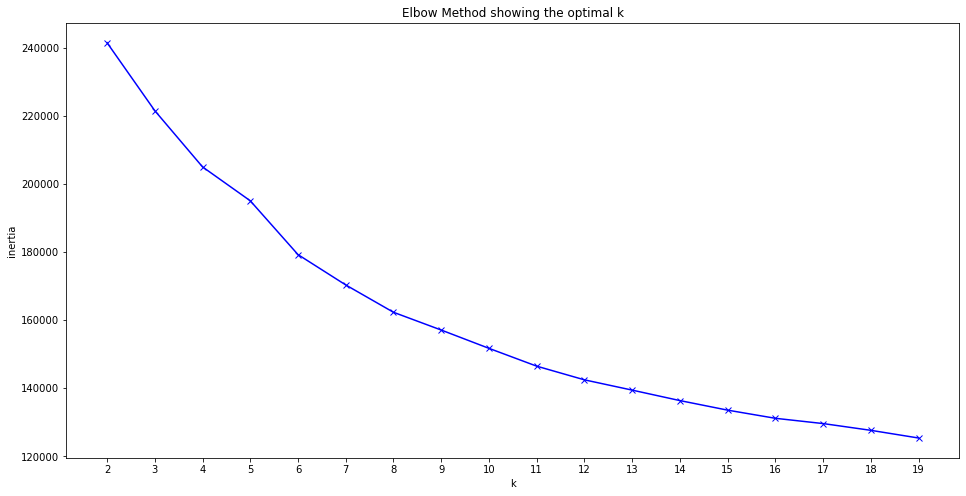

In [104]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

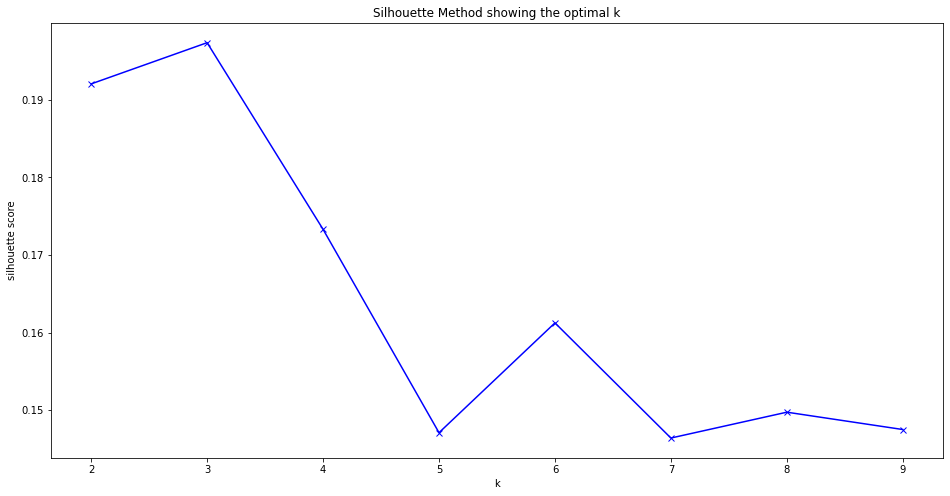

In [105]:
K = range(2, 10)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_prep)
    silhouette.append(silhouette_score(df_prep, kmeans.predict(df_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')